In [63]:
from __future__ import annotations
from itertools import combinations
import copy
import math
import random
import bin_repr as bi
from matplotlib import pyplot as plt
import numpy as np
from enum import Enum
import numpy.linalg as la
from matplotlib.colors import colorConverter


# Problema 1
Dada la ecuación:
$$x + 2y + 3z + 4w + 5v = 50 $$
haciendo uso del algoritmo genético determinar al menos una combinación que satisfaga la igualdad de dicha ecuación, considerando que: $x ∈ [−10, 0], y ∈ [50, 100], z ∈ [10, 20], w ∈ [−20, 30], v ∈ [−40, 40]$ y que solo pueden tomar valores enteros. Implementar la solución del problema para tres tipos de representaciones diferentes (binaria, código de gray, y entera), y luego comparar en un mismo gráfico la evolución del mejor individuo en cada generación.

Considerar:


In [64]:
# intervalo de trabajo
DOMINIO = np.array([[-10, 0],
                    [50, 100],
                    [10, 20],
                    [-20, 30],
                    [-40, 40]])

# numero de variables
N = DOMINIO[:, 1] - DOMINIO[:, 0] + 1       # 2^a <= N < 2^{a+1}
GEN_SIZE = np.ceil(np.log2(N)).astype(int)  # longitud de cada GEN (cromosoma)
DNA_SIZE = GEN_SIZE.sum()
EPSILON = 1

class Representation(Enum):
    BIN = DNA_SIZE
    GRAY = DNA_SIZE
    DECIMAL = len(DOMINIO)

def f(x: list[int]):
    return abs(x[0] + 2*x[1] + 3*x[2] + 4*x[3] + 5*x[4] - 50)

f_max = f(DOMINIO[:, 1])

def fit(x: list[int]):
    return f_max - f(x)

1. Una población inicial y constante de 20 individuos seleccionados de forma aleatoria.


In [65]:
class Individual():
    def __init__(self, phenotype, my_repr=Representation.DECIMAL):
        self.fitness = fit(phenotype)
        self.phenotype = phenotype
        self.my_repr = my_repr

    def getSize(self):
        return self.my_repr.value

    def getGenotype(self):
        list_repr: list[int] = []
        if self.my_repr == Representation.BIN:
            for i, gen in enumerate(self.phenotype):
                list_repr += bi.dec2bin(num=bi.my_map(gen, DOMINIO[i, 0], DOMINIO[i, 1], EPSILON), bits=GEN_SIZE[i])
        elif self.my_repr == Representation.GRAY:
            for i, gen in enumerate(self.phenotype):
                list_repr += bi.bin2gray(bi.dec2bin(num=bi.my_map(gen, DOMINIO[i, 0], DOMINIO[i, 1], EPSILON), bits=GEN_SIZE[i]))
        else:
            list_repr = copy.deepcopy(self.phenotype)
        return list_repr

    @classmethod
    def new(cls, genotype, my_rep: Representation):
        phenotype: list[int] = []
        dec_size = Representation.DECIMAL.value

        if my_rep == Representation.BIN:
            for i in range(dec_size):
                gen = genotype[GEN_SIZE[:i].sum():GEN_SIZE[:i + 1].sum()]
                phenotype.append(bi.inverse_map(bi.bin2dec(gen), DOMINIO[i, 0], EPSILON))
        elif my_rep == Representation.GRAY:
            for i in range(dec_size):
                gen = genotype[GEN_SIZE[:i].sum():GEN_SIZE[:i + 1].sum()]
                phenotype.append(bi.inverse_map(bi.bin2dec(bi.bin2dec(gen)), DOMINIO[i, 0], EPSILON))
        else:
            phenotype = copy.deepcopy(genotype)
        return cls(phenotype, my_rep)

    @classmethod
    def newRandom(cls, my_rep=Representation.DECIMAL):
       # creación de la poblacion inicial
        return Individual([random.randint(d[0], d[1]) for d in DOMINIO], my_rep)


In [66]:
POPULATION_SIZE = 20

initial_population = [Individual.newRandom(Representation.GRAY) for _ in range(POPULATION_SIZE)]

print("Población inicial con 20 individuos")
for i, ind in enumerate(initial_population):
    print(i + 1, ind.getGenotype())

Población inicial con 20 individuos
1 [1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0]
2 [1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0]
3 [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0]
4 [0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0]
5 [0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0]
6 [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1]
7 [0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0]
8 [0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1]
9 [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
10 [0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0]
11 [1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1]
12 [0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1

2. Para la selección de padres, cada individuo tiene una probabilidad $P_i = [f_i + 100]/\sum_{i=1}^{20}{(fi + 100)}$ de ser seleccionado donde $f_i$ representa la aptitud del i-ésimo individuo.

In [67]:
def selection(population: list[Individual], shift: float = 0) -> list[Individual]:
    population_fitness = np.array([ind.fitness + shift for ind in population])
    distribution = population_fitness/np.sum(population_fitness)
    return random.choices(population, distribution, k=POPULATION_SIZE)


In [68]:
print("Selección inicial")
for i, ind in enumerate([ind for ind in selection(initial_population, shift=100)]):
    print(i + 1, ind.getGenotype())

Selección inicial
1 [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0]
2 [0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0]
3 [0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0]
4 [0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1]
5 [0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]
6 [0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0]
7 [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1]
8 [1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0]
9 [1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0]
10 [0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0]
11 [0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]
12 [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1

3. Asumir un ratio de cruza del 80%, donde el punto de corte se debe elegir de forma aleatoria entre 1 y la longitud de la cadena menos 1.


In [69]:
CROSSOVER_RATIO = 0.8

def crossover(p1: list[Individual], p2: list[Individual]):
    # one-point random-crossover
    if random.random() < CROSSOVER_RATIO:
        point = random.randint(1, p1.getSize() - 2)
        c1, c2 = copy.deepcopy(p1.getGenotype()), copy.deepcopy(p2.getGenotype())
        
        c1[point:], c2[point:] = c2[point:], c1[point:]
        return Individual.new(c1, p1.my_repr), Individual.new(c2, p1.my_repr)
    else:
        return p1, p2


In [70]:
p1 = initial_population[0]
p2 = initial_population[1]
c1, c2 = crossover(p1, p2)

print("Padre 1", p1.getGenotype())
print("Padre 2", p2.getGenotype())

print("Hijo 1", c1.getGenotype())
print("Hijo 2", c2.getGenotype())

Padre 1 [1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0]
Padre 2 [1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0]
Hijo 1 [1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0]
Hijo 2 [1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0]


4. Asumir un ratio de mutación del $10\%$, el proceso de mutación del o los individuos se realiza generando un valor entero entre 1 y la longitud de la cadena este valor indica la posición del alelo a cambiar, el valor a cambiar debe generarse de forma aleatoria para el caso de la representación entera y para las
otras dos representaciones debe hacer un cambio de valor de cero a uno o viceversa.

In [71]:
MUTATION_RATIO = 0.1


def mutation(ind: list[Individual]):
    # bit-flip mutation
    mut = copy.deepcopy(ind.getGenotype())
    if random.random() < MUTATION_RATIO:
        # punto aleatorio de la cadea
        point = random.randint(0, ind.getSize() - 1)
        # valor a cambiar aleatorio 
        if ind.getSize() > 5:
            mut[point] = (mut[point] + 1) % 2
        else:
            mut[point] = random.randint(DOMINIO[point, 0], DOMINIO[point, 1])
    return Individual.new(mut, ind.my_repr)


In [72]:
ind = initial_population[0]
print("Original", ind.getGenotype())
print("Mutado  ", mutation(ind).getGenotype())

Original [1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0]
Mutado   [1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0]


In [73]:
def get_best(population: list[Individual]):
    best = population[0]
    for ind in population:
        if f(ind.phenotype) < f(best.phenotype):
            best = ind
    return best


5. La selección de los individuos de la nueva generación se deben seleccionar en funciona a la probabilidad
$Pi = f_i/\sum_{i=1}^{20}{f_i}$

Text(0.5, 1.0, 'Generation number 50')

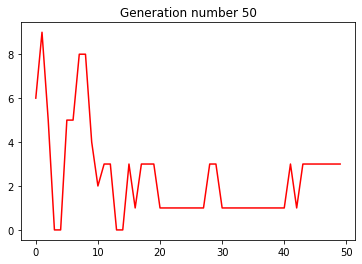

In [74]:
# GA CANONICAL FLOW
generation_number = 0

population = [Individual.newRandom(Representation.GRAY) for _ in range(POPULATION_SIZE)]
MAX_GENERATION = 50
best: list[Individual] = []

# SE DETIENE DESPUES DE 50 GENERACIONES
while generation_number < MAX_GENERATION:
    generation_number += 1

    # SELECCION DE PADRES
    parents = selection(population, shift=100)
    offspring = []
    # CRUZAMIENTO
    for p1, p2 in zip(parents[::2], parents[1::2]):
        if not p1.phenotype == p2.phenotype:
            kid1, kid2 = crossover(p1, p2)
            offspring.append(kid1)
            offspring.append(kid2)

    # MUTACION
    offspring_mut = []
    for mutant in offspring:
        offspring_mut.append(mutation(mutant))

    parents.extend(offspring)
    parents.extend(offspring_mut)

    population = selection(parents)
    best.append(get_best(population))

plt.plot([f(x.phenotype) for x in best], "r-")
plt.title(f"Generation number {generation_number}")


In [75]:
solution = get_best(best)
print(f"Solution:\n x*={solution.phenotype}, f(x*)={f(solution.phenotype)}")

Solution:
 x*=[-8, 70, 19, -6, -23], f(x*)=0


# Tarea (corresponde a 3 puntos de la 2da PC)

Determine el radio de circunscripción mínimo para 10 círculos con radio $i^{(−0.5)}$ para $i = 1, 2, ..., 10 $ aplicando un algoritmos genético. Considerar el mismo criterio para las operaciones de: selección de padres, cruzamiento, mutación y selección de sobrevivientes.


***Solución***

Se minimizará la diferencia de área del radio grande con la suma de las áreas de los radios pequeños sujeto a restricciones tangenciales:

\begin{align*}
\min & \quad | \pi R^2 - \sum_{i=1}^m \pi r_i^2|\\
\text{s.t}\quad &\|c_i - c_j\| \ge r_i + r_j,\quad\forall i, j \in \{1, ..., m\}\\
& \|C - c_i\| \le R - r_i,\quad \forall i \in \{1, ..., m\}
\end{align*}

In [76]:
# intervalo de trabajo
NUM_CIRCLES = 11
# dominio de los circulos pequeños
DOMAIN = np.array([[-2, 2.]] * (2 * NUM_CIRCLES + 1))
# dominio para el circulo grande
DOMAIN[-2] = [-1, 1]
# dominio del radio grande
DOMAIN[-1] = [2, 6]

radii = [1 / math.sqrt(i) for i in range(1, 11)]

# numero de variables
DNA_SIZE = 23
CROSSOVER_RATIO = 0.9
POPULATION_SIZE = 100
MUTATION_RATIO = 0.8


def checkTangent(centers, R):
    # restricciones
    for i in range(len(radii)):
        for j in range(len(radii)):
            if i != j:
                if not la.norm(centers[i] - centers[j]) > radii[i] + radii[j]:
                    return False
        if not la.norm(centers[-1] - centers[i]) < R - radii[i]:
            return False
    return True


def fit(phenotype):
    centers = phenotype[:-1].reshape(NUM_CIRCLES, 2)
    R = phenotype[-1]

    diff_area = R**2
    for i in range(len(radii)):
        diff_area -= radii[i]**2

    return abs(diff_area) if checkTangent(centers, R) else 1e3


In [77]:
class Individual():
    def __init__(self, phenotype):
        self.fitness = fit(phenotype)
        self.phenotype = phenotype

    @classmethod
    def newRandom(cls):
        return cls(np.array([random.uniform(DOMAIN[i, 0], DOMAIN[i, 1]) for i in range(len(DOMAIN))]))


In [79]:
def crossover(p1: list[Individual], p2: list[Individual]):
    # one-point random-crossover
    if random.random() < CROSSOVER_RATIO:
        c1, c2 = copy.deepcopy(p1.phenotype), copy.deepcopy(p2.phenotype)
        point = random.randint(1, DNA_SIZE - 2)
        c1[point:], c2[point:] = c2[point:], c1[point:]
        return Individual(c1), Individual(c2)
    else:
        return p1, p2


In [80]:
def mutation(ind: list[Individual]):
    mut = copy.deepcopy(ind.phenotype)
    if random.random() < MUTATION_RATIO:
        # punto aleatorio de la cadea
        point = random.randint(0, DNA_SIZE - 1)
        # valor a cambiar aleatorio 
        mut[point] = random.uniform(DOMAIN[point, 0], DOMAIN[point, 1])
    return Individual(mut)


In [81]:
def tournament_selection(population: list[Individual]):
    # tournament selection
    tournament_size = 5
    new_offspring = []
    for _ in range(len(population)):
        # select max of each 5 until has len(population) individuals
        candidates = [random.choice(population) for _ in range(tournament_size)]
        new_offspring.append(min(candidates, key=lambda ind: ind.fitness))
    return new_offspring


In [82]:
def get_best(population: list[Individual]):
    best = population[0]
    for ind in population:
        if fit(ind.phenotype) < fit(best.phenotype):
            best = ind
    return best


In [ ]:
# GA CANONICAL FLOW
generation_number = 0
population = [Individual.newRandom() for _ in range(POPULATION_SIZE)]
MAX_GENERATION = 2500
best: list[Individual] = []

# SE DETIENE DESPUES DE 500 GENERACIONES
while generation_number < MAX_GENERATION:
    generation_number += 1

    # SELECCION DE PADRES
    parents = tournament_selection(population)
    crossed_offspring: list[Individual] = []
    # CRUZAMIENTO
    for p1, p2 in zip(parents[::2], parents[1::2]):
        kid1, kid2 = crossover(p1, p2)
        crossed_offspring.append(kid1)
        crossed_offspring.append(kid2)
    # MUTACION
    mutated_offspring: list[Individual] = []
    for mutant in crossed_offspring:
        mutated_offspring.append(mutation(mutant))

    population = mutated_offspring.copy()

    best.append(get_best(population))
    if generation_number%50 == 0:
        print("Generation:", generation_number)

plt.plot([fit(x.phenotype) for x in best], "r-")
plt.title(f"Generation number {generation_number}")


In [91]:
solution = get_best(best)
centers = solution.phenotype[:-1].reshape(NUM_CIRCLES, 2)
R = solution.phenotype[-1]
print(f"Solution:\n x*={centers, R}, f(x*)={fit(solution.phenotype)}")

Solution:
 x*=(array([[-0.67193723,  1.917548  ],
       [ 1.0327755 ,  1.53052392],
       [-1.66179228,  0.38096624],
       [-1.99360659, -0.8539687 ],
       [ 1.6080599 , -0.36142189],
       [ 1.85021463,  0.66916381],
       [-0.58588454, -0.33016873],
       [ 0.11783781, -1.50417095],
       [ 1.25126839, -1.28012373],
       [ 0.75446397,  0.312578  ],
       [-0.34312944,  0.29069739]]), 2.6666279911335384), f(x*)=4.181936589128637


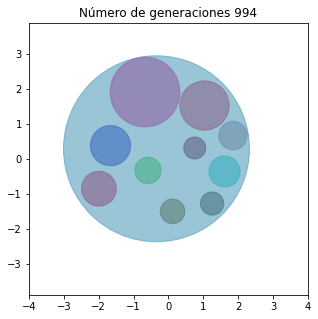

In [92]:
def drawPlot(centers, R):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_title("Número de generaciones %d"%generation_number)
    ax.set_xlim([-4, 4])
    ax.set_ylim([-4, 4])
    ax.set_aspect('equal', adjustable="datalim")
    for i in range(0, 10):
        face_color = colorConverter.to_rgba(c=np.random.rand(3,), alpha=0.5)
        ax.add_patch(plt.Circle(centers[i], radii[i], color=face_color))
    
    face_color = colorConverter.to_rgba(c=np.random.rand(3,), alpha=0.5)
    ax.add_patch(plt.Circle(centers[-1], R, color=face_color))
drawPlot(centers, R)